[1. 0. 0.] [1.         0.72709852 0.9025    ]
[1. 0. 0.] [ 1.         -1.75537111  0.9025    ]


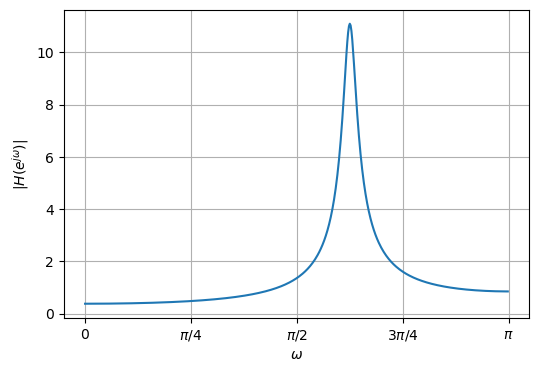

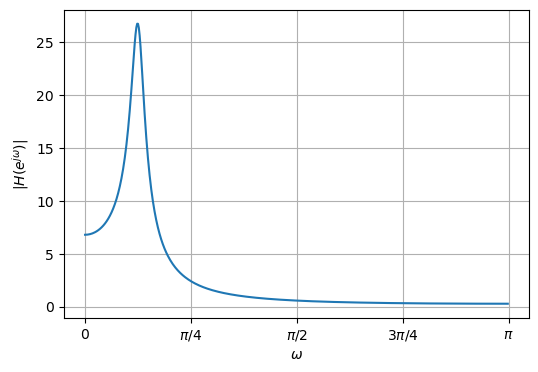

In [5]:
# zkouska  2023-24 - 2op 
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram, lfilter, freqz, tf2zpk, freqs, decimate, convolve2d 
import os
os.chdir('/homes/kazi/cernocky/ISS/2023-24/2op')
# ----------------  frekv char , podle ni urceni nul a plu 
n2 = 0
def draw_h(p1):
    p2 = np.conj(p1)
    b = np.poly([n1,n2])
    a = np.poly([p1,p2])
    print(b,a)
    om,H = freqz(b,a,512)
    fig = plt.figure(figsize=(6,4))
    plt.plot(om,np.abs(H))
    plt.gca().set_xticks([0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi])
    plt.gca().set_xticklabels(['$0$', '$\pi / 4$','$\pi / 2$','$3\pi / 4$','$\pi$'])
    fig.gca().set_xlabel('$\omega$'); fig.gca().set_ylabel('$|H(e^{j\omega})|$'); fig.gca().grid()
    return (fig)

p1 = 0.95*np.exp(1j * 5 / 8 * np.pi); fig=draw_h(p1)
fig.savefig('fig/Hejom_1.eps',bbox_inches='tight')
p1 = 0.95*np.exp(1j * 1 / 8 * np.pi); fig=draw_h(p1)
fig.savefig('fig/Hejom_2.eps',bbox_inches='tight')

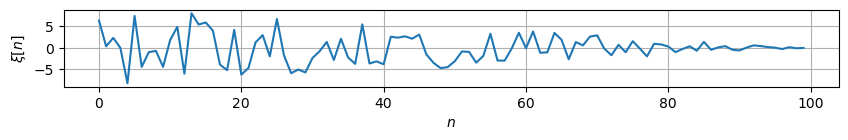

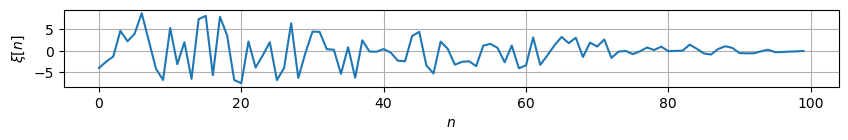

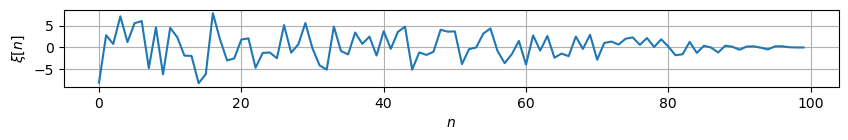

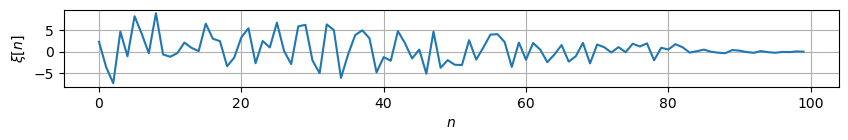

In [6]:
# ----------------  realizace nah. signalu ... 
n = np.arange(100)
def draw_rand(x):
    afig = plt.figure(figsize=(10,1))
    plt.plot(n,x)
    afig.gca().set_ylabel(r'$\xi[n]$'); afig.gca().set_xlabel('$n$'); afig.gca().grid(); 
    return(afig)
    
x = np.random.uniform(-1,1,n.shape) * np.linspace(10,0,100)
fig=draw_rand(x); fig.savefig('fig/rand_1.eps',bbox_inches='tight')  
x = np.random.uniform(-1,1,n.shape) * np.linspace(10,0,100)
fig=draw_rand(x); fig.savefig('fig/rand_2.eps',bbox_inches='tight')  
x = np.random.uniform(-1,1,n.shape) * np.linspace(10,0,100)
fig=draw_rand(x); fig.savefig('fig/rand_3.eps',bbox_inches='tight')  
x = np.random.uniform(-1,1,n.shape) * np.linspace(10,0,100)
fig=draw_rand(x); fig.savefig('fig/rand_4.eps',bbox_inches='tight')  

1.0
0.21024011951759228 0.1875
0.7499909638917113 0.75


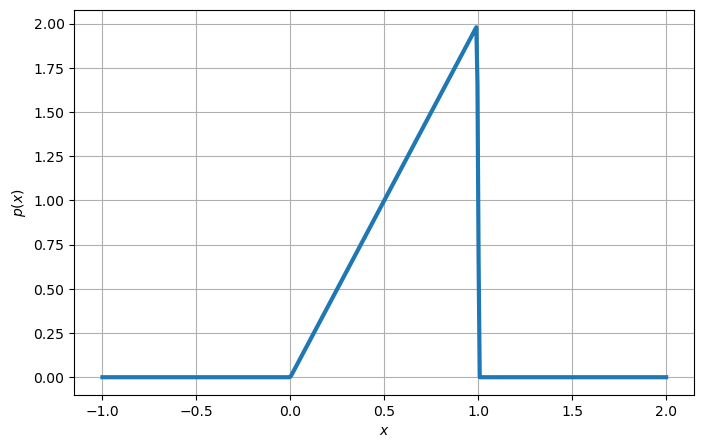

In [7]:
# ------------ p(x) --------------
x = np.linspace(-1, 2, 500)
Fx = np.zeros(x.size)
ii = np.argwhere((x > 0) & (x < 1))
Fx[ii] = np.power(x[ii],2)
Fx[x>=1] = 1
dx = x[1]-x[0]
px = np.gradient(Fx, dx)
fig=plt.figure(figsize=(8,5)); plt.plot(x, px, linewidth=3); 
fig.gca().set_xlabel('$x$'); fig.gca().set_ylabel('$p(x)$'); fig.gca().grid()
fig.savefig('fig/px.eps',bbox_inches='tight')
# Proba 0.2 ... 0.5
print (np.sum(px * dx))
ii = np.argwhere((x > 0.2) & (x < 0.5))
print (np.sum(px[ii] * dx), 0.75 * 0.3 / 2 + 0.25 * 0.3)
ii = np.argwhere((x > 0.5))
print (np.sum(px[ii] * dx), 0.5 + 0.25)

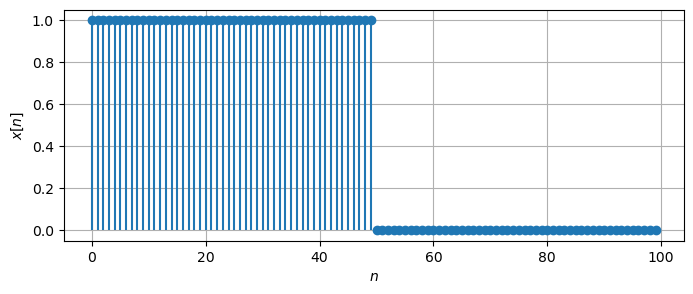

In [8]:
# ---------- signal pro korelak ----------
n = np.arange(100)
x = np.zeros(n.shape)
x[0:50] = 1
fig=plt.figure(figsize=(8,3)); plt.stem(n, x, basefmt=" "); 
fig.gca().set_xlabel('$n$'); fig.gca().set_ylabel('$x[n]$'); fig.gca().grid()
fig.savefig('fig/x_nah.eps',bbox_inches='tight')

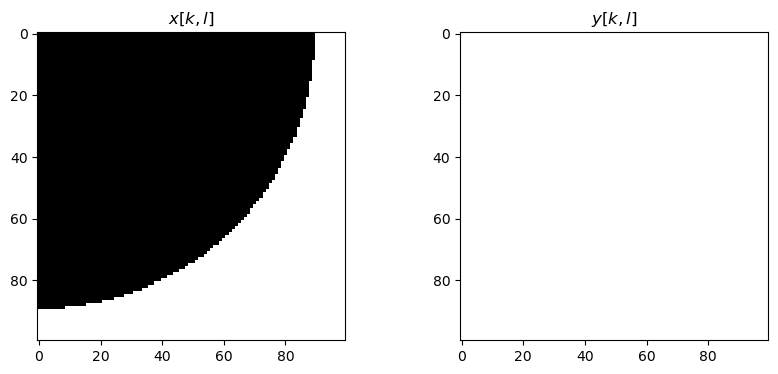

In [9]:
# ----------- obrazek pro 2d filtr ---------
src = np.ones((100,100))
target = src.copy()
for k in range(100): 
    for l in range(100): # strasna prasecina ... 
        if ((k ** 2 + l ** 2) < 8000):
            target[k,l] = 0
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].imshow(target, 'gray', vmin=0, vmax=1); ax[0].set_title('$x[k,l]$')
ax[1].imshow(src, 'gray', vmin=0, vmax=1); ax[1].set_title('$y[k,l]$')
fig.savefig("fig/img.eps")

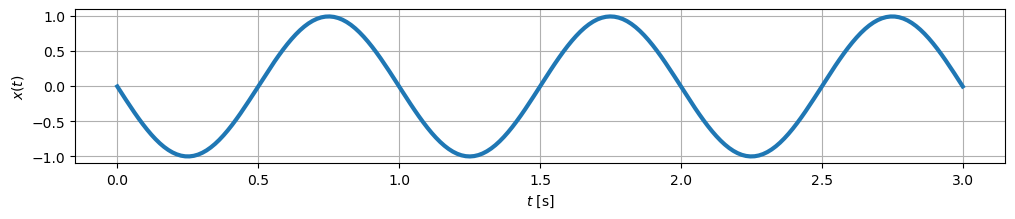

In [13]:
# --- cis pro FR ---
t = np.linspace(0, 3, 200)
x = np.cos(2*np.pi * t + np.pi/2 )
fig=plt.figure(figsize=(12,2)); 
plt.plot(t, x, linewidth=3); 
fig.gca().set_xlabel('$t$ [s]'); fig.gca().set_ylabel('$x(t)$'); fig.gca().grid()
fig.savefig('fig/cos.eps',bbox_inches='tight')

65.0
65.0537025116128


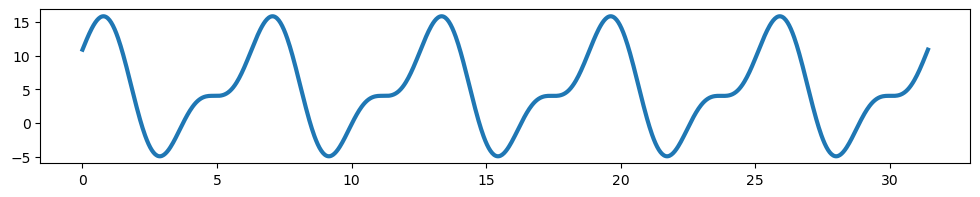

In [11]:
# ---- vykon z koef FR -----------
c0 = 5
c1 = 4 * np.exp(-1j / 3); cm1 = np.conj(c1)
c2 = 2 * np.exp(-1j * 2); cm2 = np.conj(c2)
t = np.linspace(0,10*np.pi,1000)
x = c0 + 2*np.abs(c1) * np.cos(t + np.angle(c1)) + 2*np.abs(c2) * np.cos(2*t + np.angle(c2))
fig=plt.figure(figsize=(12,2)); 
plt.plot(t, x, linewidth=3); 
# vykon z FR 
Pfr = np.sum(np.power(np.abs([cm2,cm1,c0,c1,c2]),2)); print (Pfr)
# vykon ze signalu 
Psig = np.sum(np.power(x,2)) / 1000; print (Psig)

In [12]:
# ------- spoj syst -------------
n1 = 0
n2 = 0
p1 = -1+1000j
p2 = -1-1000j
jom = 1000j
numerator = (jom - n1) * (jom - n2)
denominator = (jom - p1) * (jom - p2)
absH = np.abs(numerator / denominator)
absHrucne = 1000 * 1000 / (1 * 2000)
print(absH, absHrucne)

499.9999375000117 500.0
